In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
tracks = pd.read_csv('.././datasets/aziz_tracks.csv')
tracks.head()

,track,artist,album,popularity_score,track_id,track_uri,spotify_link,preview,album_image_large,album_image_small,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics
0,Climbing a Wall,Floral,Floral EP,39,2GZLWeDxVyCxDBdVzVjbMi,spotify:track:2GZLWeDxVyCxDBdVzVjbMi,https://open.spotify.com/track/2GZLWeDxVyCxDBd...,https://p.scdn.co/mp3-preview/e9074cec5dbf81b0...,https://i.scdn.co/image/ab67616d00001e024ffed7...,https://i.scdn.co/image/ab67616d000048514ffed7...,...,1,0.0436,0.0177,0.286000,0.0890,0.678,151.097,219266,1,NaN
1,ROXANNE,Arizona Zervas,ROXANNE,88,696DnlkuDOXcMAnKlTgXXK,spotify:track:696DnlkuDOXcMAnKlTgXXK,https://open.spotify.com/track/696DnlkuDOXcMAn...,https://p.scdn.co/mp3-preview/17c8499c72603f1a...,https://i.scdn.co/image/ab67616d00001e02069a93...,https://i.scdn.co/image/ab67616d00004851069a93...,...,0,0.1480,0.0522,0.000000,0.4600,0.457,116.735,163636,5,"all for the 'gram bitches love the 'gram oh, w..."
2,I'm God,Clams Casino,Instrumental Relics,63,0FVuyC9RP5MACjp4lgU3qZ,spotify:track:0FVuyC9RP5MACjp4lgU3qZ,https://open.spotify.com/track/0FVuyC9RP5MACjp...,https://p.scdn.co/mp3-preview/b3b4e58ac20fe9b9...,https://i.scdn.co/image/ab67616d00001e029dd5e3...,https://i.scdn.co/image/ab67616d000048519dd5e3...,...,1,0.0336,0.0711,0.760000,0.1020,0.089,141.927,277711,4,NaN
3,Thank You,Dido,No Angel,71,3yUcJwYu7fXAfqMj9krY6l,spotify:track:3yUcJwYu7fXAfqMj9krY6l,https://open.spotify.com/track/3yUcJwYu7fXAfqM...,https://p.scdn.co/mp3-preview/61c1b2d6f13f53af...,https://i.scdn.co/image/ab67616d00001e023e5cbf...,https://i.scdn.co/image/ab67616d000048513e5cbf...,...,0,0.0424,0.3000,0.000215,0.0665,0.765,79.984,218360,4,"my tea's gone cold, i'm wondering why i got ou..."
4,BLIND (feat. Young Thug),DaBaby,BLAME IT ON BABY (DELUXE),79,2T5NBwKRySiCR78vVk08vr,spotify:track:2T5NBwKRySiCR78vVk08vr,https://open.spotify.com/track/2T5NBwKRySiCR78...,https://p.scdn.co/mp3-preview/0d8eb3d8a247f65d...,https://i.scdn.co/image/ab67616d00001e02e818d0...,https://i.scdn.co/image/ab67616d00004851e818d0...,...,0,0.3460,0.0115,0.000000,0.0971,0.754,162.973,153467,4,"yeah, yeah, yeah i've been blind for a while n..."


In [94]:
tracks['lyrics'].fillna('lyrics not available', inplace = True)

In [95]:
cvec = CountVectorizer(stop_words = 'english', ngram_range = (2,4), max_df = 0.70, min_df = 3, max_features = 100)

In [96]:
x = pd.DataFrame(cvec.fit_transform(tracks['lyrics']).todense(), columns = cvec.get_feature_names())
x

,21 21,ain got,ain nothin,ask life,ask life don,ayy ayy,ayy ayy ayy,baby don,baby don know,baby turn,...,uh huh,ve got,won tell,yeah don,yeah don know,yeah got,yeah hey,yeah yeah,yeah yeah yeah,yeah yeah yeah yeah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
x.columns

Index(['21 21', 'ain got', 'ain nothin', 'ask life', 'ask life don', 'ayy ayy',
       'ayy ayy ayy', 'baby don', 'baby don know', 'baby turn',
       'baby turn turn', 'behavior turn', 'behavior turn fast',
       'behavior turn fast ask', 'believe know', 'brand new', 'cause know',
       'come come', 'don fuck', 'don know', 'don need', 'don say', 'don think',
       'don wanna', 'don want', 'don worry', 'far away', 'fast ask',
       'fast ask life', 'fast ask life don', 'feel like', 'fuck nigga',
       'handle behavior', 'handle behavior turn', 'handle behavior turn fast',
       'hey hey', 'hey hey hey', 'hey hey hey hey', 'hmm hmm', 'hmm hmm hmm',
       'just got', 'just like', 'know better', 'know don', 'know know',
       'know lit', 'know lit turn', 'know love', 'know won', 'know won tell',
       'know yeah', 'la la', 'la la la', 'la la la la', 'life don',
       'life like', 'lil bitch', 'lit turn', 'look like', 'make em', 'mm mm',
       'money money', 'na na', 'na na na',

In [139]:
def word_freq(array):

    cvec = CountVectorizer(stop_words = stop_words, ngram_range = (3,5), max_df = 0.75, min_df = 3, max_features = 100)    
    words_df = pd.DataFrame(cvec.fit_transform(array).todense(), columns = cvec.get_feature_names())
    
    return words_df.sum().sort_values(ascending = False).head(40)

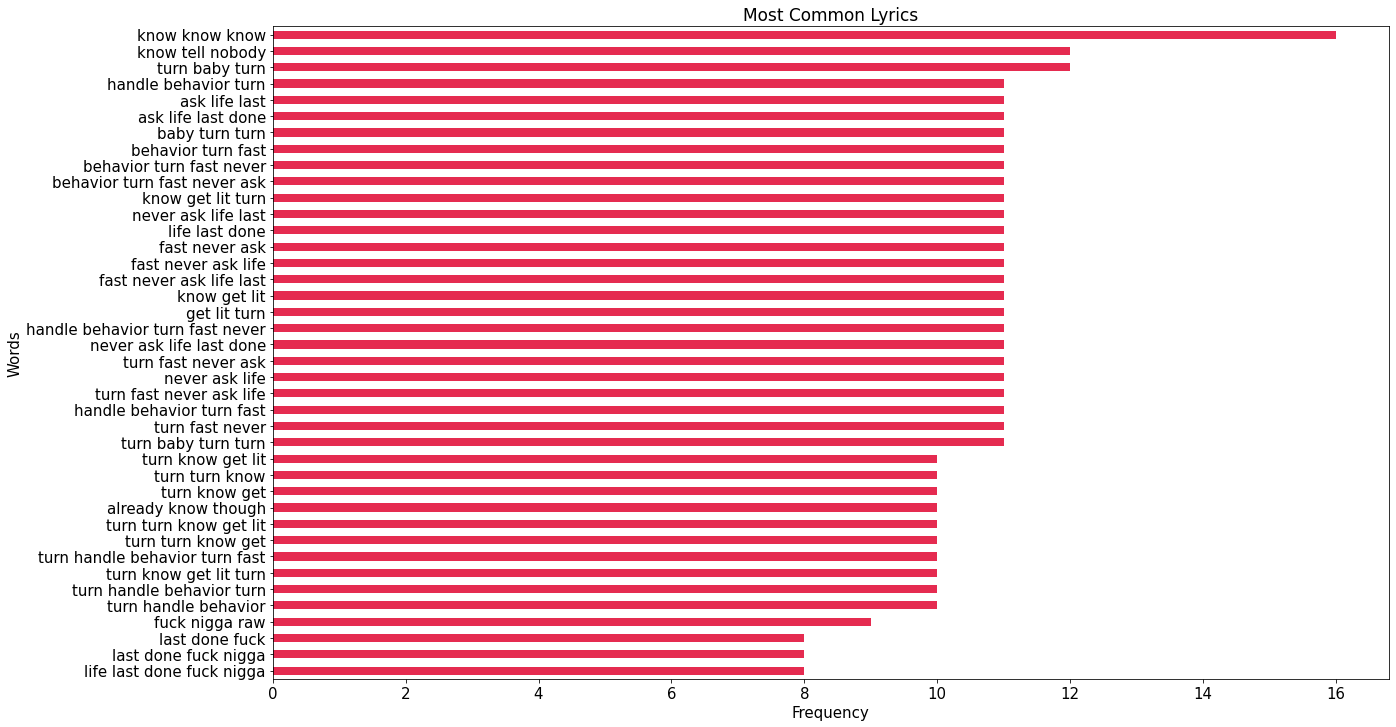

In [140]:
word_freq(tracks['lyrics']).sort_values(ascending = True).plot(kind = 'barh', figsize=(20,12), fontsize = 15, color = '#e52b50');
plt.title('Most Common Lyrics',size = 17);
plt.xlabel('Frequency', size = 15);
plt.ylabel('Words', size = 15);

In [130]:
to_add = ['yeah', 'yea', 'ya', 'oh', 'la', 'mm', 'ooh', 'hey', 'na', 'nah', 'uh', 'huh', 'ayy', 'ay', 'hmm', 've', 're']

In [132]:
stop_words = stopwords.words('english') + to_add